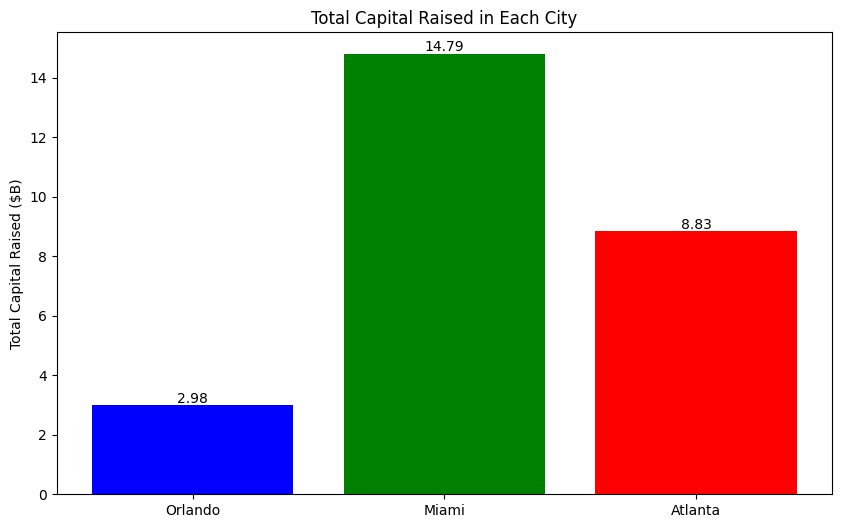

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
data_1 = pd.read_excel("/kaggle/input/top50-companies-by-city/PitchBook_All_Columns_2023_05_16_14_03_09.xlsx", header=7)
data_2 = pd.read_excel("/kaggle/input/top50-companies-by-city/PitchBook_All_Columns_2023_05_16_15_53_34.xlsx", header=7)
data_3 = pd.read_excel("/kaggle/input/top50-companies-by-city/PitchBook_All_Columns_2023_05_16_15_56_50.xlsx", header=7)

data_1.columns = data_1.iloc[0]
data_1 = data_1[1:]

data_2.columns = data_2.iloc[0]
data_2 = data_2[1:]

data_3.columns = data_3.iloc[0]
data_3 = data_3[1:]

# Display the first few rows of the dataframe
#data_1.head()
#data_2.head()
#data_3.head()


## Convert 'Total Raised' to numeric in each dataset, coercing non-numeric values to NaN
data_1['Total Raised'] = pd.to_numeric(data_1['Total Raised'], errors='coerce')
data_2['Total Raised'] = pd.to_numeric(data_2['Total Raised'], errors='coerce')
data_3['Total Raised'] = pd.to_numeric(data_3['Total Raised'], errors='coerce')

# Check the data type again to confirm the conversion

#data_type_1 = data_1['Total Raised'].dtype
#data_type_2 = data_2['Total Raised'].dtype
#data_type_3 = data_3['Total Raised'].dtype

#data_type_1, data_type_2, data_type_3


# Calculate the sum of 'Total Raised' in each dataset
total_raised_sum_1 = data_1['Total Raised'].sum()
total_raised_sum_2 = data_2['Total Raised'].sum()
total_raised_sum_3 = data_3['Total Raised'].sum()

#total_raised_sum_1, total_raised_sum_2, total_raised_sum_3

# Convert the sums to billions
sums_in_billion = [total_raised_sum_1 / 1000, total_raised_sum_2 / 1000, total_raised_sum_3 / 1000]

# Identify the most common 'HQ City' in each dataset
city_1 = data_1['HQ City'].mode()[0]
city_2 = data_2['HQ City'].mode()[0]
city_3 = data_3['HQ City'].mode()[0]

# Create the bar plot with city names
plt.figure(figsize=(10, 6))
bars = plt.bar([city_1, city_2, city_3], sums_in_billion, color=['blue', 'green', 'red'])
plt.ylabel('Total Capital Raised ($B)')
plt.title('Total Capital Raised in Each City')

# Add data labels
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.show()





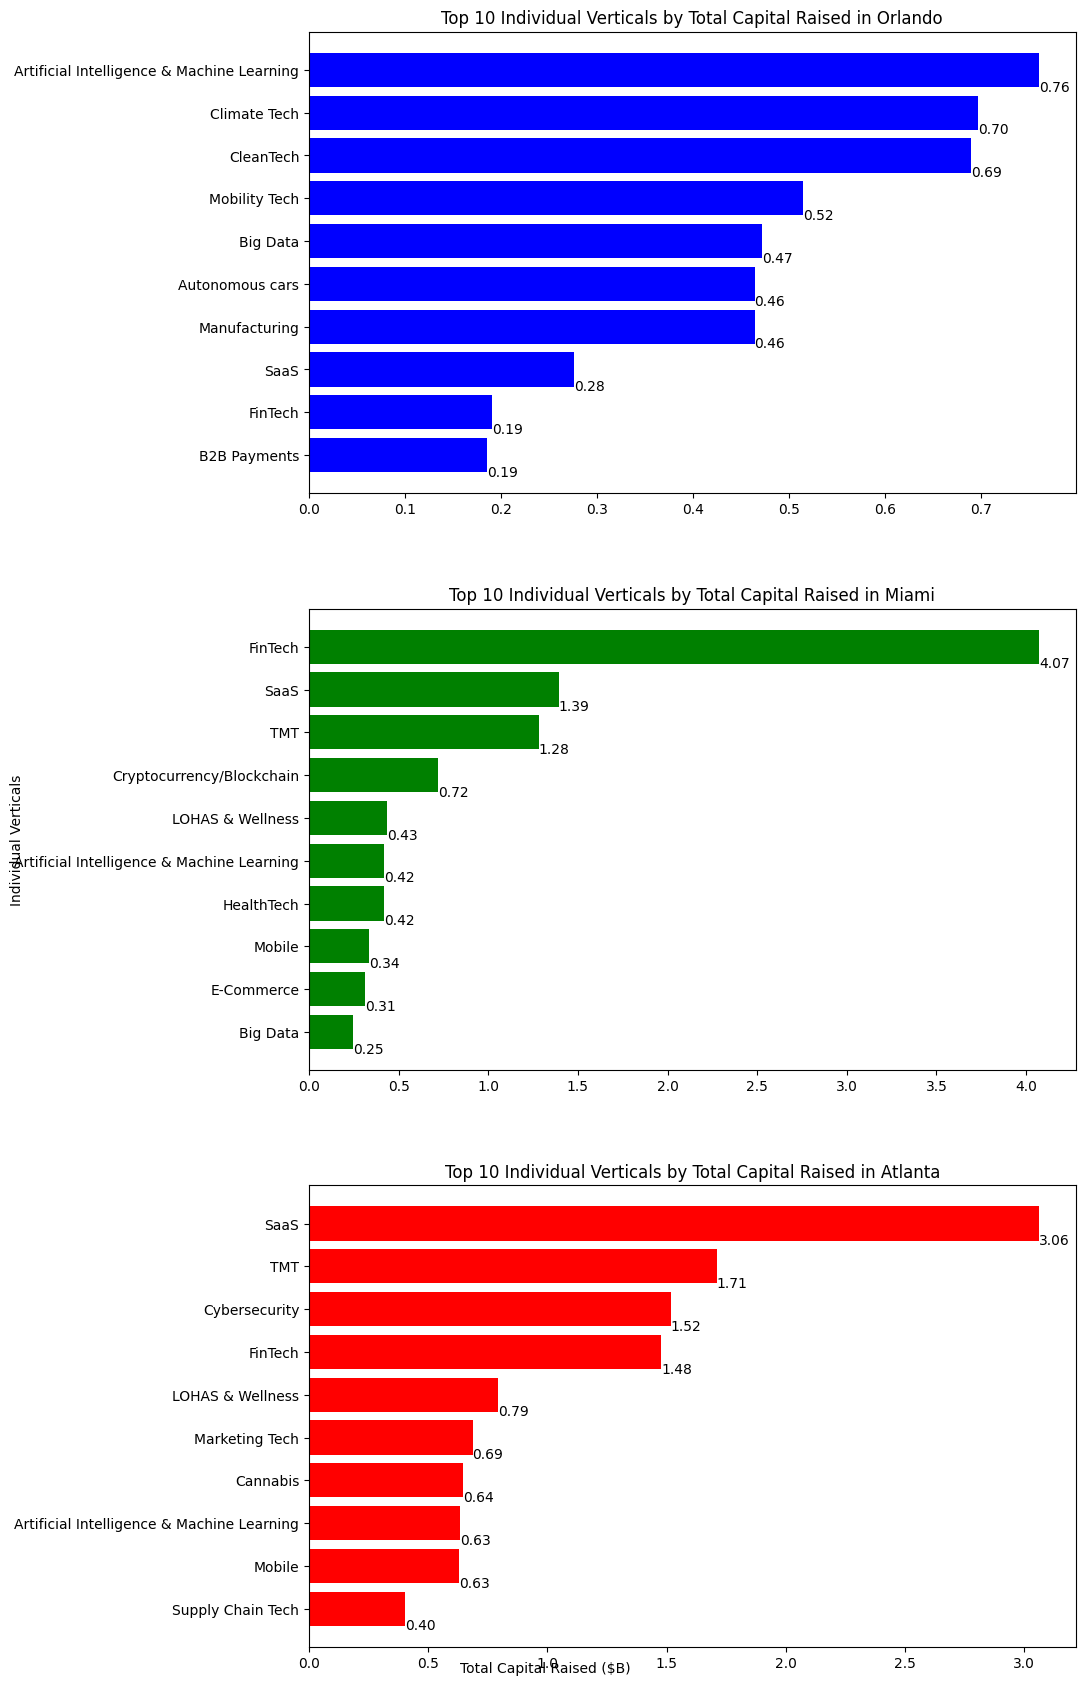

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
data_1 = pd.read_excel("/kaggle/input/top50-companies-by-city/PitchBook_All_Columns_2023_05_16_14_03_09.xlsx", header=7)
data_2 = pd.read_excel("/kaggle/input/top50-companies-by-city/PitchBook_All_Columns_2023_05_16_15_53_34.xlsx", header=7)
data_3 = pd.read_excel("/kaggle/input/top50-companies-by-city/PitchBook_All_Columns_2023_05_16_15_56_50.xlsx", header=7)

data_1.columns = data_1.iloc[0]
data_1 = data_1[1:]

data_2.columns = data_2.iloc[0]
data_2 = data_2[1:]

data_3.columns = data_3.iloc[0]
data_3 = data_3[1:]

# Display the first few rows of the dataframe
#data_1.head()
#data_2.head()
#data_3.head()


## Convert 'Total Raised' to numeric in each dataset, coercing non-numeric values to NaN
data_1['Total Raised'] = pd.to_numeric(data_1['Total Raised'], errors='coerce')
data_2['Total Raised'] = pd.to_numeric(data_2['Total Raised'], errors='coerce')
data_3['Total Raised'] = pd.to_numeric(data_3['Total Raised'], errors='coerce')

# Check the data type again to confirm the conversion

#data_type_1 = data['Total Raised'].dtype
#data_type_2 = data_2['Total Raised'].dtype
#data_type_3 = data_3['Total Raised'].dtype

#data_type_1, data_type_2, data_type_3

def split_and_sum(df):
    return (
        df.assign(Verticals=df['Verticals'].str.split(', '))
        .explode('Verticals')
        .groupby('Verticals')['Total Raised']
        .sum()
        .nlargest(10)
    )

# Calculate the sum of 'Total Raised' in each dataset
total_raised_sum_1 = data_1['Total Raised'].sum()
total_raised_sum_2 = data_2['Total Raised'].sum()
total_raised_sum_3 = data_3['Total Raised'].sum()

#total_raised_sum_1, total_raised_sum_2, total_raised_sum_3

# Convert the sums to billions
sums_in_billion = [total_raised_sum_1 / 1000, total_raised_sum_2 / 1000, total_raised_sum_3 / 1000]

# Identify the most common 'HQ City' in each dataset
city_1 = data_1['HQ City'].mode()[0]
city_2 = data_2['HQ City'].mode()[0]
city_3 = data_3['HQ City'].mode()[0]



# Apply the function to each city's dataset
top_individual_verticals_1 = split_and_sum(data_1[data_1['HQ City'] == city_1])
top_individual_verticals_2 = split_and_sum(data_2[data_2['HQ City'] == city_2])
top_individual_verticals_3 = split_and_sum(data_3[data_3['HQ City'] == city_3])

# Convert the series to dataframes
top_individual_verticals_1 = pd.DataFrame(top_individual_verticals_1).reset_index()
top_individual_verticals_2 = pd.DataFrame(top_individual_verticals_2).reset_index()
top_individual_verticals_3 = pd.DataFrame(top_individual_verticals_3).reset_index()


# Add data labels to the bar plots

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Create bar plots
bars1 = axs[0].barh(top_individual_verticals_1['Verticals'][::-1], (top_individual_verticals_1['Total Raised']/1000)[::-1], color='blue')
bars2 = axs[1].barh(top_individual_verticals_2['Verticals'][::-1], (top_individual_verticals_2['Total Raised']/1000)[::-1], color='green')
bars3 = axs[2].barh(top_individual_verticals_3['Verticals'][::-1], (top_individual_verticals_3['Total Raised']/1000)[::-1], color='red')

# Set common labels
fig.text(0.5, 0.04, 'Total Capital Raised ($B)', ha='center', va='center')
fig.text(0.06, 0.5, 'Individual Verticals', ha='center', va='center', rotation='vertical')

# Set individual titles
axs[0].set_title('Top 10 Individual Verticals by Total Capital Raised in Orlando')
axs[1].set_title('Top 10 Individual Verticals by Total Capital Raised in Miami')
axs[2].set_title('Top 10 Individual Verticals by Total Capital Raised in Atlanta')

# Add data labels
for ax, bars in zip(axs, [bars1, bars2, bars3]):
    for bar in bars:
        width = bar.get_width()
        label = f'{width:.2f}'
        ax.annotate(label, (width, bar.get_y()), ha='left', va='center')

plt.tight_layout(pad=5.0)
plt.show()



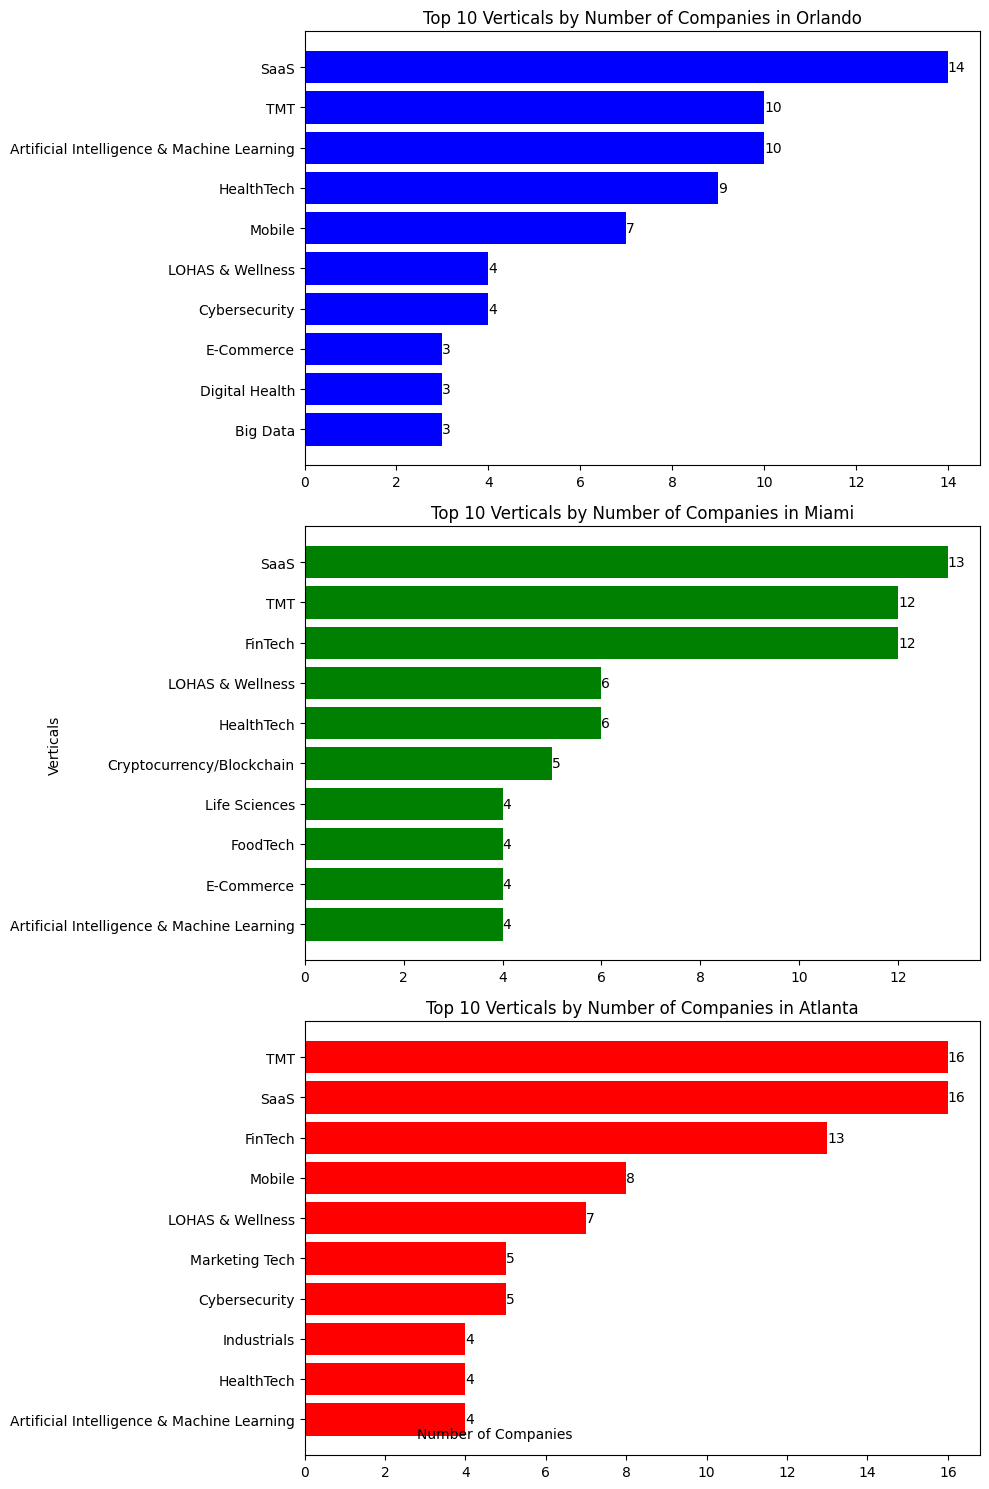

In [3]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
data_1 = pd.read_excel("/kaggle/input/top50-companies-by-city/PitchBook_All_Columns_2023_05_16_14_03_09.xlsx", header=7)
data_2 = pd.read_excel("/kaggle/input/top50-companies-by-city/PitchBook_All_Columns_2023_05_16_15_53_34.xlsx", header=7)
data_3 = pd.read_excel("/kaggle/input/top50-companies-by-city/PitchBook_All_Columns_2023_05_16_15_56_50.xlsx", header=7)

data_1.columns = data_1.iloc[0]
data_1 = data_1[1:]

data_2.columns = data_2.iloc[0]
data_2 = data_2[1:]

data_3.columns = data_3.iloc[0]
data_3 = data_3[1:]


def split_and_count(df):
    return (
        df.assign(Verticals=df['Verticals'].str.split(', '))
        .explode('Verticals')
        .groupby('Verticals')
        .size()
        .nlargest(10)
    )

# Apply the function to each dataset
top_verticals_by_count_1 = split_and_count(data_1)
top_verticals_by_count_2 = split_and_count(data_2)
top_verticals_by_count_3 = split_and_count(data_3)

top_verticals_by_count_1, top_verticals_by_count_2, top_verticals_by_count_3

# Identify the most common 'HQ City' in each dataset
city_1 = data_1['HQ City'].mode()[0]
city_2 = data_2['HQ City'].mode()[0]
city_3 = data_3['HQ City'].mode()[0]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the data
axs[0].barh(top_verticals_by_count_1.sort_values().index, top_verticals_by_count_1.sort_values().values, color='blue')
axs[1].barh(top_verticals_by_count_2.sort_values().index, top_verticals_by_count_2.sort_values().values, color='green')
axs[2].barh(top_verticals_by_count_3.sort_values().index, top_verticals_by_count_3.sort_values().values, color='red')


# Set common labels
fig.text(0.5, 0.04, 'Number of Companies', ha='center', va='center')
fig.text(0.06, 0.5, 'Verticals', ha='center', va='center', rotation='vertical')

# Set individual titles
axs[0].set_title(f'Top 10 Verticals by Number of Companies in {city_1}')
axs[1].set_title(f'Top 10 Verticals by Number of Companies in {city_2}')
axs[2].set_title(f'Top 10 Verticals by Number of Companies in {city_3}')

# Add data labels
for i in range(3):
    for rect in axs[i].patches:
        axs[i].text(rect.get_width(), rect.get_y() + rect.get_height() / 2, 
                    f'{int(rect.get_width())}', va='center')

plt.tight_layout()
plt.show()
